# Optic Cup Segmentation Mark 3

In [119]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

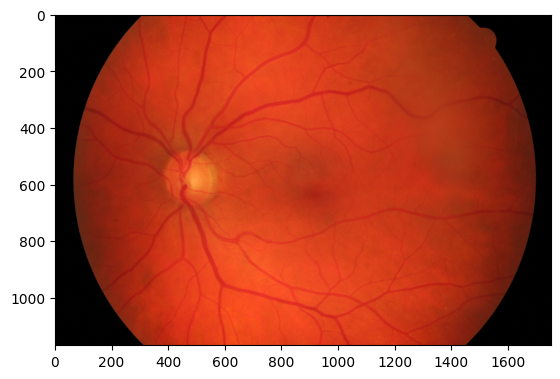

In [120]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
plt.imshow(hrf_res)

In [121]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [122]:
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

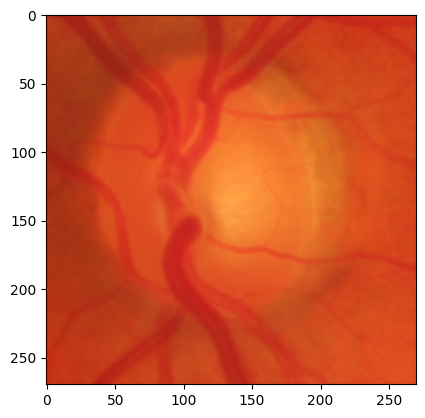

In [123]:
plt.imshow(roi)

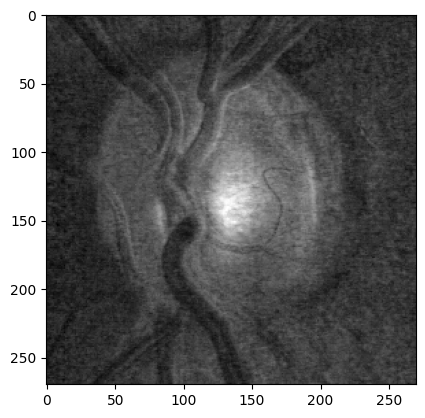

In [124]:
clahe = cv2.createCLAHE(2.0, (8,8))
roiclahe = clahe.apply(roi[:,:,2])
plt.imshow(roiclahe, 'gray')

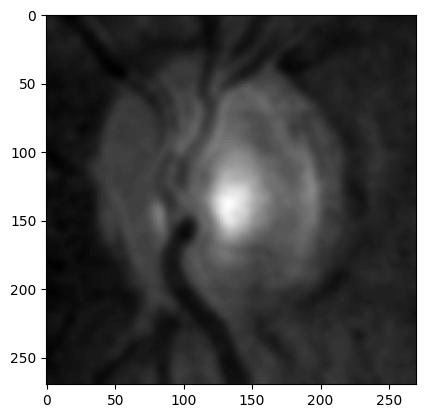

In [125]:
blur = cv2.GaussianBlur(roiclahe.copy(), (17,17), 0)
plt.imshow(blur, 'gray')

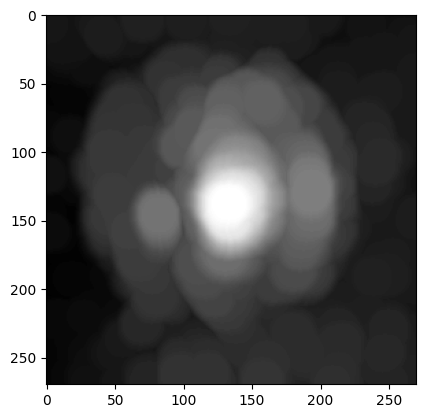

In [126]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))
dilation = cv2.dilate(blur.copy(), kernel)
plt.imshow(dilation, 'gray')

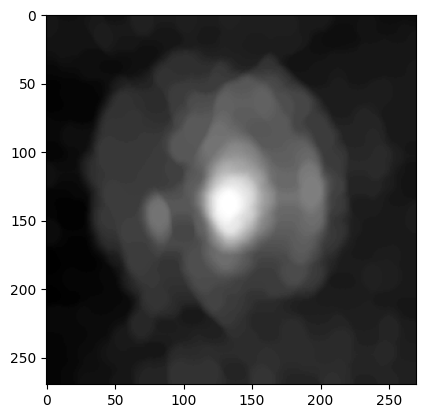

In [127]:
erosion_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,10))
erosion = cv2.erode(dilation.copy(), erosion_kernel)
plt.imshow(erosion, 'gray')

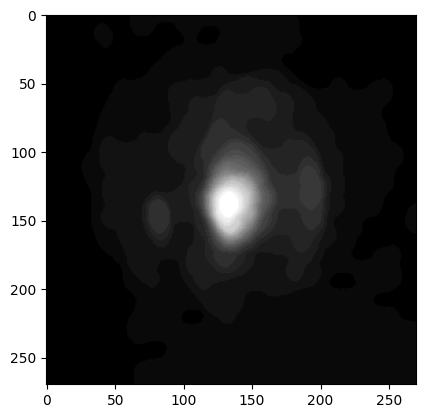

In [128]:
gamma_corrected = adjust_gamma(erosion, 3)
plt.imshow(gamma_corrected, 'gray')